**Importing required libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

**Importing required data from the Google Drive**

In [2]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
path = '/content/drive/MyDrive/GL - Neural Networks Project/Dataset_CSV; Signal.csv'
df = pd.read_csv(path)

In [4]:
df.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.shape

(1599, 12)

**EDA**

In [6]:
# Extracting the column-wise 'NULL' value %

round((df.isnull().sum()/df.count()),0)

,0
Parameter 1,0.0
Parameter 2,0.0
Parameter 3,0.0
Parameter 4,0.0
Parameter 5,0.0
Parameter 6,0.0
Parameter 7,0.0
Parameter 8,0.0
Parameter 9,0.0
Parameter 10,0.0


Observation:
*   There are no 'NULL' values present in the dataset



In [7]:
# Checking for Duplicates
df.duplicated().sum()

240

Observations:

*   There are 240 duplicate records in the data set. These will be dropped

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
# New shape of dataset
df.shape

(1359, 12)

**Visulaizations**

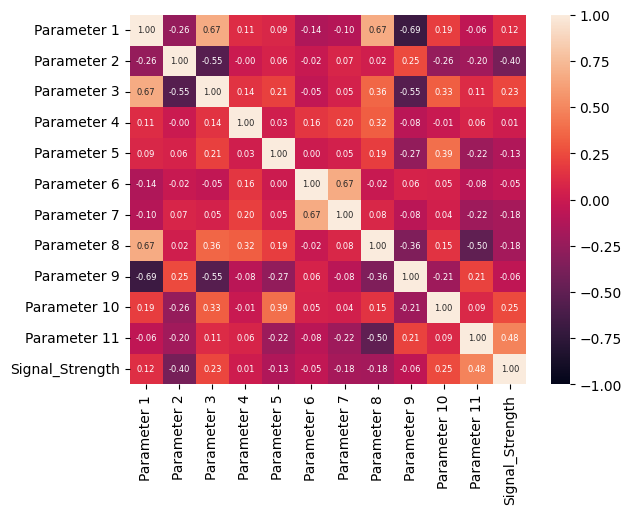

In [10]:
# Considering all the dependent varaibles are numeric, we'll start with the correlation analysis

# Heatmap

plt.figsize = (20,20)
sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1, fmt=".2f", annot = True, annot_kws={"fontsize": 6})
plt.show();

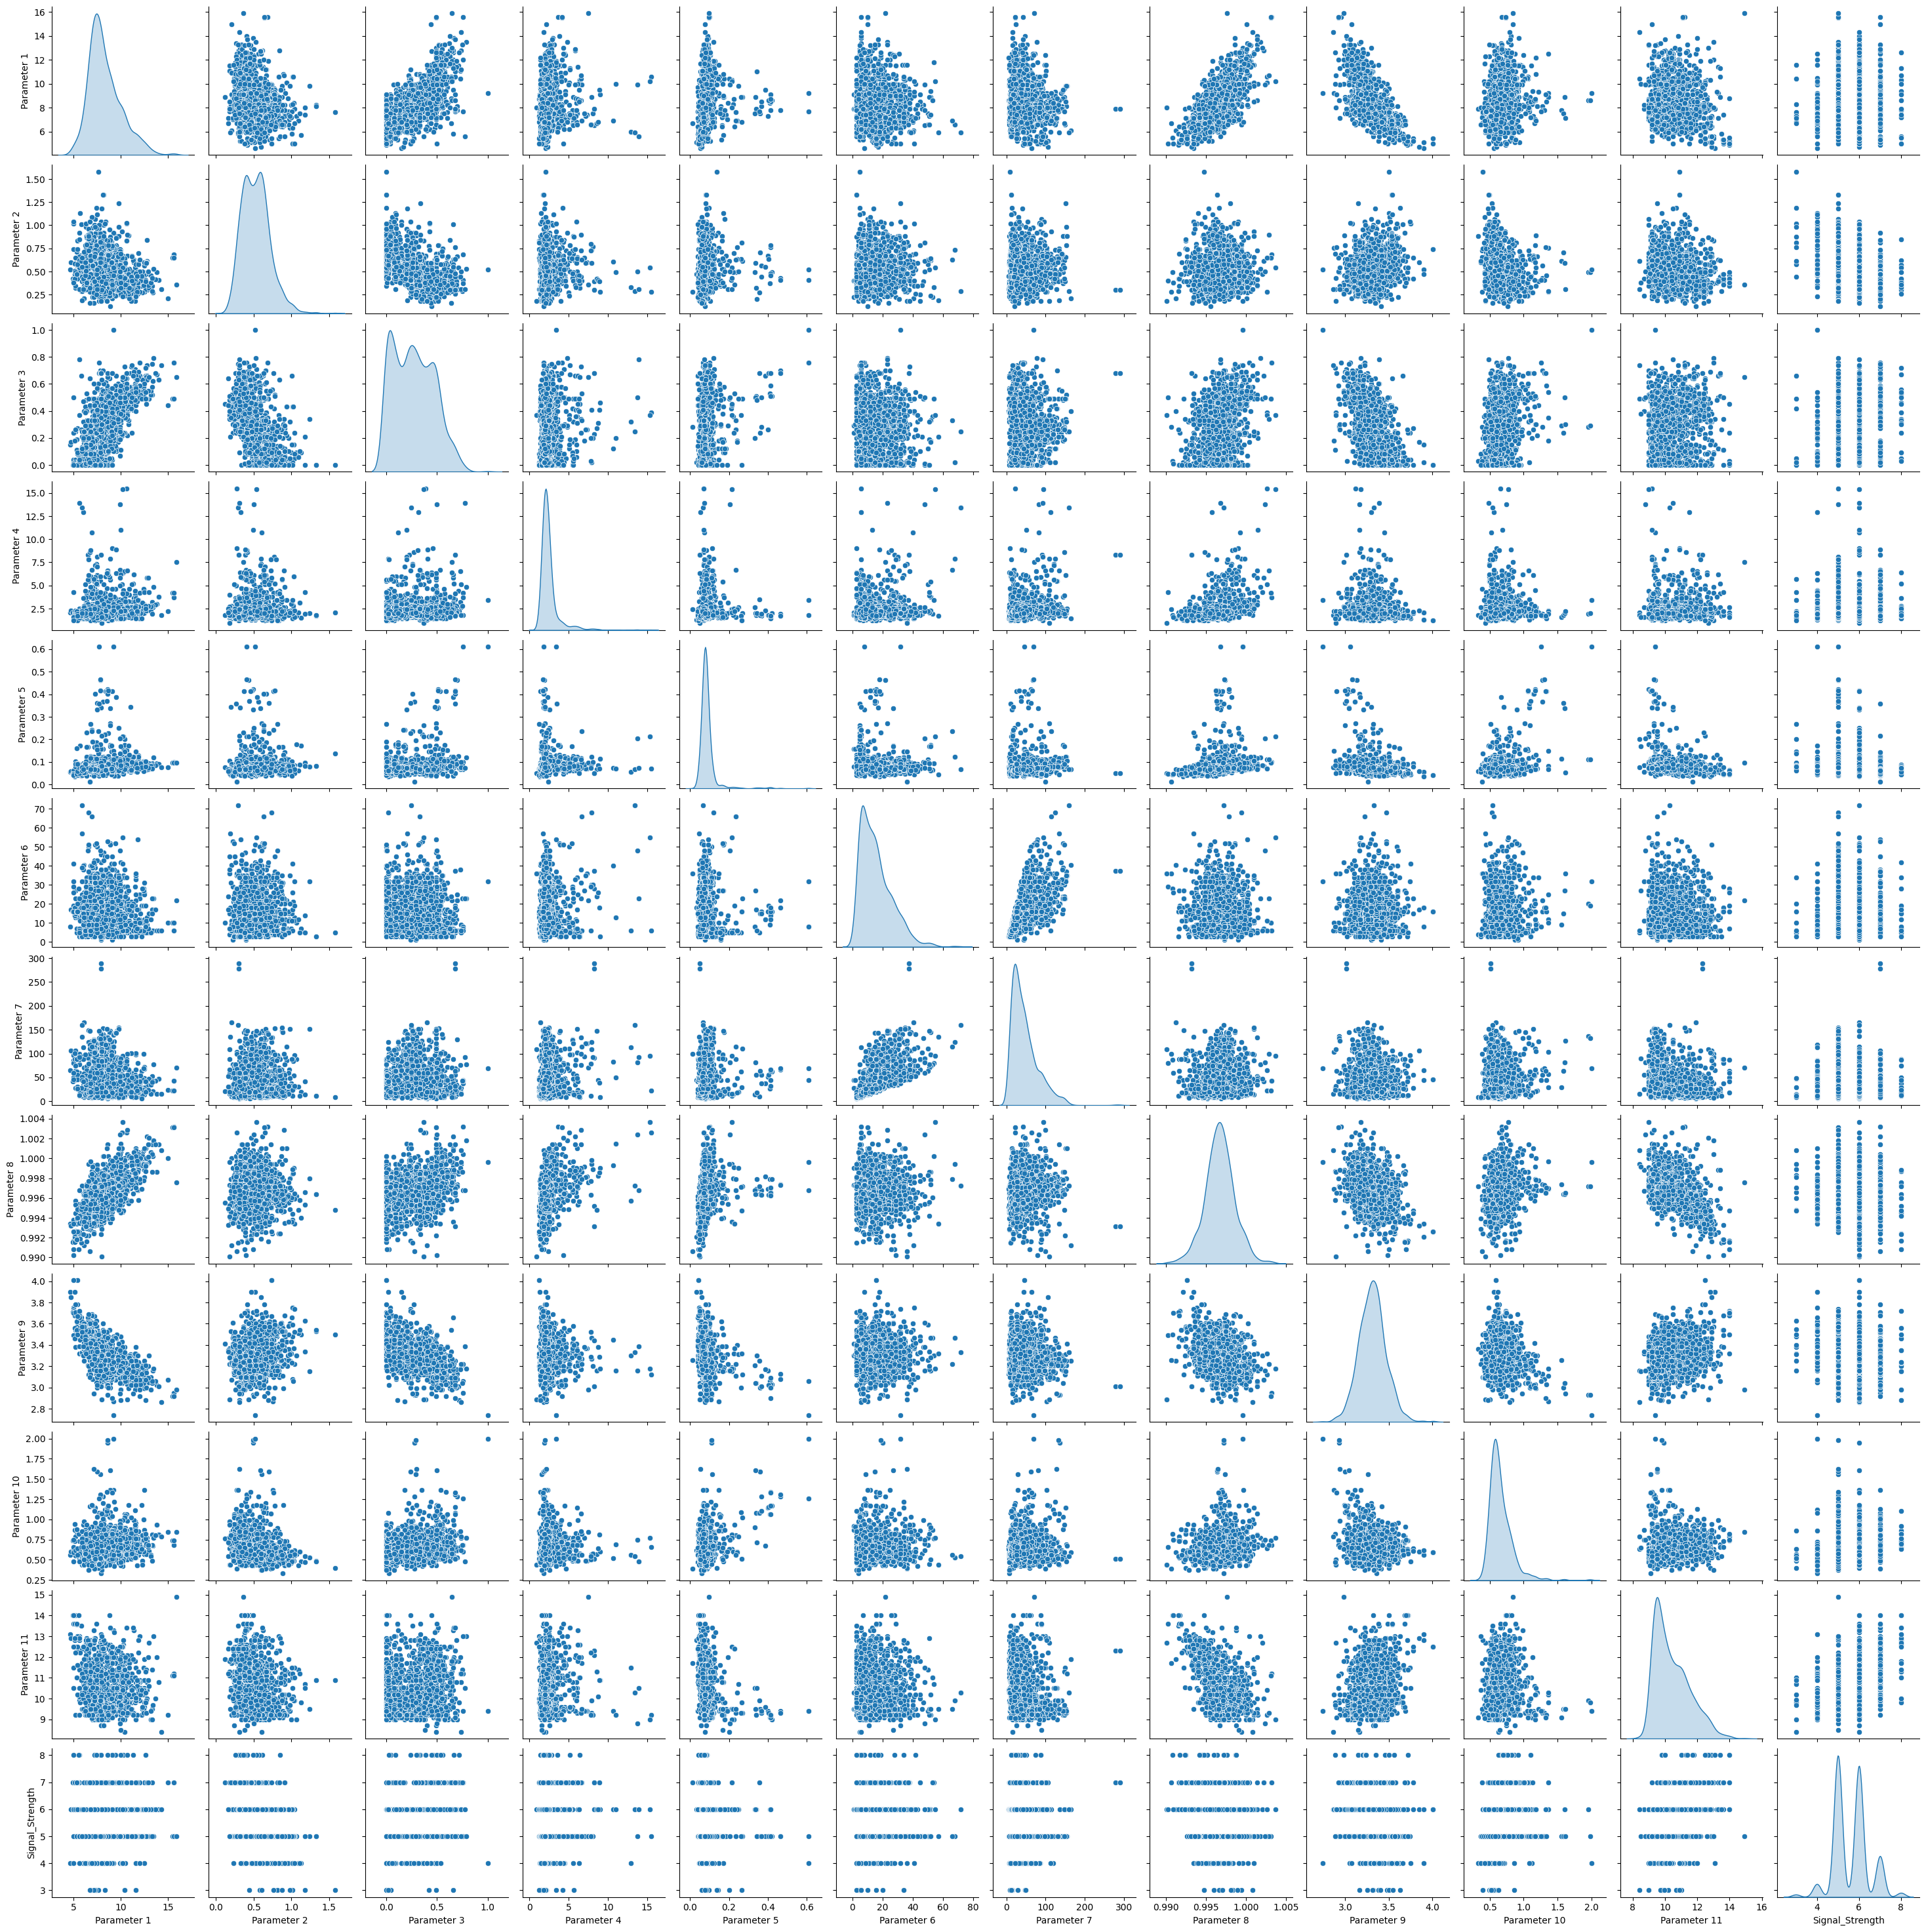

In [11]:
# Creating a Pariplot

sns.pairplot(df, diag_kind='kde')

From the heat-map and the pair plots, we can conclude the following variables have negative correlation between them:
1. Parameters 1 and 9 (-0.69) - Strong Negative Correlation
2. Parameters 2 and 3 (-0.55)
3. Parameters 8 and 11 (-0.5)

Simultaneously, Parameters 6 and 7, and Parameters 1 and 8  have a strong positive correlation of 0.67

In [12]:
target = df.iloc[:,-1]

value_counts = target.value_counts()

df_counts = value_counts.reset_index()

df_counts.columns = ['Signal_Strength', 'Count']

df_counts.index = range(6)

df_counts


,Signal_Strength,Count
0,5,577
1,6,535
2,7,167
3,4,53
4,8,17
5,3,10


<ipython-input-13-f7857ba64a7a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= df_counts , x='Signal_Strength', y= 'Count', palette='Reds');


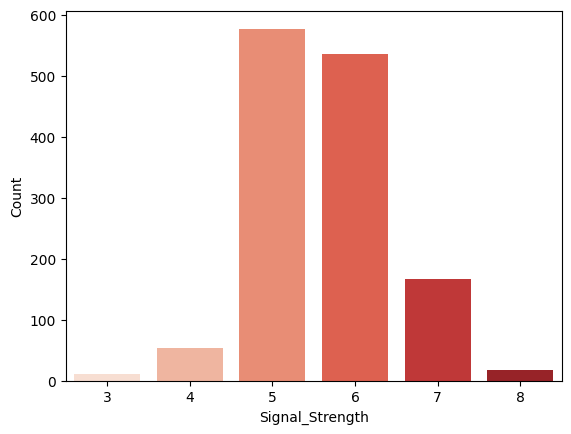

In [13]:
# Box Plot for each of the traget variable
sns.barplot(data= df_counts , x='Signal_Strength', y= 'Count', palette='Reds');

**Train-Test Split**

In [14]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [15]:
Y.value_counts()

,count
Signal_Strength,
5,577
6,535
7,167
4,53
8,17
3,10


In [16]:
# One-Hot Encoding for the Target varaible

Y_OHE = pd.get_dummies(Y, dtype = int)
Y_OHE

,3,4,5,6,7,8
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,1,0,0
5,0,0,1,0,0,0
...,...,...,...,...,...,...
1593,0,0,0,1,0,0
1594,0,0,1,0,0,0
1595,0,0,0,1,0,0
1597,0,0,1,0,0,0


In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y_OHE, test_size = 0.3, random_state = 79)

In [18]:
# Checking for the shape of each of the 'x' and 'y' data-sets after splits

print("The shape of dataframe 'x_train' is:", x_train.shape,
      '\n'
      "The shape of dataframe 'y_train' is:", y_train.shape,
      '\n'
      "The shape of dataframe 'x_test' is:", x_test.shape,
      '\n'
      "The shape of dataframe 'y_test' is:", y_test.shape,
      )


The shape of dataframe 'x_train' is: (951, 11) 
The shape of dataframe 'y_train' is: (951, 6) 
The shape of dataframe 'x_test' is: (408, 11) 
The shape of dataframe 'y_test' is: (408, 6)


Normalising the data

In [19]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

# Fitting and transforing the training set
x_train_s = ss.fit_transform(x_train)

x_trains = pd.DataFrame(x_train_s, columns = x_train.columns)

# Using the same metrics of StandardScaler() learnt from x_train to transform the test set as well

x_test_s = ss.transform(x_test)

x_tests = pd.DataFrame(x_test_s, columns = x_test.columns)


In [20]:
x_trains.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11
0,3.058561,-0.610282,2.098309,0.293183,-0.038231,0.114169,-0.110141,2.493083,-1.606653,0.822232,-0.425849
1,-0.222982,-1.011928,0.458838,-0.456930,-0.478391,-1.042420,-1.106265,-1.311647,-0.274712,-0.711336,0.656912
2,-1.128235,2.415449,-1.334332,-0.381918,-0.654456,-0.078596,-0.411997,-0.947533,1.818339,-1.183202,0.656912
3,0.059910,-0.047978,-0.258430,0.143160,-0.060239,-1.138802,-0.864780,0.076209,-0.338138,-0.534385,-0.516079
4,0.738850,0.380444,1.176107,-0.156885,-0.170279,1.174376,0.735055,1.595990,1.184082,-0.534385,-0.696540


In [21]:
x_tests.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11
0,-0.336138,0.701761,-1.180632,-0.681963,-1.050601,-1.138802,-1.136450,-0.250966,0.549824,-1.124219,-0.967230
1,0.682272,0.219786,-0.002263,-0.156885,-0.104255,0.692464,2.938602,0.603911,-0.274712,-0.652352,-0.967230
2,0.229645,1.558605,-1.283099,-0.982008,-0.368351,1.945435,0.040787,-0.778668,-0.718692,-0.475402,-0.606310
3,0.003332,-1.172586,0.612539,-0.081873,-0.192287,0.114169,-0.110141,-1.179721,-0.021009,0.645282,1.829903
4,-1.071657,-0.690611,-0.207196,-0.681963,-0.456383,-1.042420,-1.045893,-0.462047,0.169269,-0.593369,-1.147690


### **Building Neural Network**

In [22]:
# Creating a base model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

model = Sequential()

In [47]:
# Adding layers to the 'model'
'''
  Here, the activation function used in the first layer is "ReLU" and in Second Layer, it is "Sigmoid".
  Both these layers have 32, 64 neurons respectively
  Also, since our target variable is discrete in nature and ranges from '3 to 8' (6 values), we'll be using 'softmax' as our output layer's
  activation function
'''

model.add(Dense(32, activation='relu', input_shape =(11,)))
model.add(Dense(64, activation = 'sigmoid'))
model.add(Dense(6, activation = 'softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
# Assigning the Optimizers and Loss Functions for the 'model'

from tensorflow.keras import optimizers, losses

ad = optimizers.Adam(learning_rate=1e-3)
loss = 'categorical_crossentropy'


In [49]:
# Creating Callbacks for Model Training

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

checkpoint = ModelCheckpoint("model.weights.h5", monitor='val_accuracy',
                            save_weights_only=True, mode='max',verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.00001,model='auto')

callbacks = [checkpoint,reduce_lr]


In [50]:
# Compiling the model

model.compile(loss = loss, optimizer =ad, metrics = ['accuracy'])

In [51]:
# Model Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 32)                  │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,654 (22.09 KB)

 Trainable params: 5,654 (22.09 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
# Fitting the model

history = model.fit(x_trains, y_train, epochs = 10, callbacks=callbacks, validation_split=0.2)

Epoch 1/10
13/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1068 - loss: 2.3835    
Epoch 1: saving model to model.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.1525 - loss: 2.2465 - val_accuracy: 0.3874 - val_loss: 1.6477 - learning_rate: 0.0010
Epoch 2/10
13/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4341 - loss: 1.5567 
Epoch 2: saving model to model.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4272 - loss: 1.5216 - val_accuracy: 0.3874 - val_loss: 1.3292 - learning_rate: 0.0010
Epoch 3/10
13/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4194 - loss: 1.3415  
Epoch 3: saving model to model.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4221 - loss: 1.3153 - val_accuracy: 0.3874 - val_loss: 1.2355 - learning_rate: 0.0010
Epoch 4/10
16/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4746 - loss: 1.2119  
Epoch 4: saving model to model.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4748 - loss: 1.2

In [53]:
#Predicting y_test using the model

y_pred = model.predict(x_tests)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [54]:
#Checking the probabilities assigned to each of the classes for y_pred[0]
y_pred[0]

array([0.01024786, 0.03989812, 0.5778877 , 0.2876591 , 0.07431772,
       0.00998944], dtype=float32)

In [55]:
# Assigning the Class to y_pred basis the max() probability

y_pred_class=[]

for i in y_pred:
  y_pred_class.append((np.argmax(i)) + 3)

```
Note:
      np.argmax() function returns the indices of the maximum values along `y_pred`.
      Considering our classes range from 3 to 8, i.e., (3,4,5,6,7,8),
      we've added "+3" to the index value to determine the actual class

```



In [56]:
# Printing the first value from the `y_pred_class`
y_pred_class[0]

5

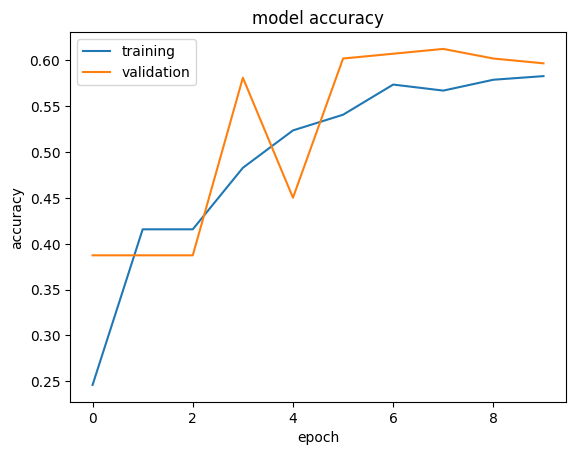

In [57]:
# Creating Accuracy curves for Training and Validation sets

# Training set loss and accuracy

loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)

#Plot for 'Accuracy'

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()


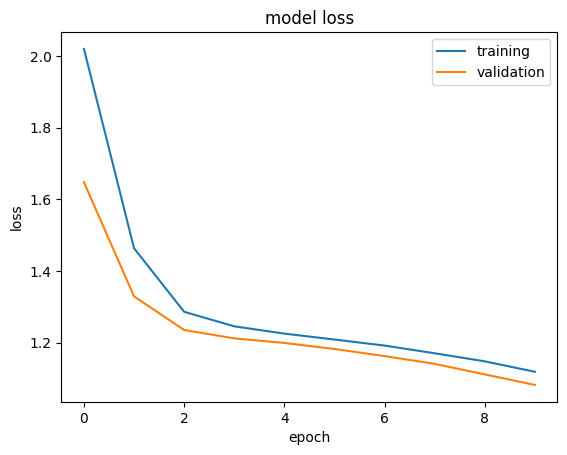

In [58]:
#Plot for 'Loss'

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()


**Model Optimization**

In [59]:
# Optimizing the above Neural Network model by adding "Batch Normalization" and "Dropouts"

model1 = Sequential()

In [60]:
# Adding layers to the 'model'
'''
  Here, the activation function used in the first layer is "ReLU" and in Second Layer, it is "Sigmoid".
  Both these layers have 32, 64 neurons respectively
  Also, since our target variable is discrete in nature and ranges from '3 to 8' (6 values), we'll be using 'softmax' as our output layer's
  activation function
'''

from tensorflow.keras.layers import Dropout

model1.add(Dense(32, activation='relu', input_shape =(11,)))
model1.add(BatchNormalization())
model1.add(Dense(64, activation = 'sigmoid'))
model1.add(Dropout(0.2))
model1.add(BatchNormalization())
model1.add(Dense(6, activation = 'softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [71]:
# Compiling the model

adm = optimizers.Adam(learning_rate=1e-3)
model1.compile(loss = losses.categorical_crossentropy, optimizer =adm, metrics = ['accuracy'])

In [72]:
# Model Summary
model1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,270 (12.77 KB)

 Trainable params: 3,078 (12.02 KB)

 Non-trainable params: 192 (768.00 B)

In [73]:
# Defining new set of call backs


checkpoint = ModelCheckpoint("model1.weights.h5", monitor='val_accuracy',
                            save_weights_only=True, mode='max',verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.00001,model='auto')

callbacks1 = [checkpoint,reduce_lr]


In [74]:
# Fitting the model

history = model1.fit(x_trains, y_train, epochs = 10, callbacks=callbacks1, validation_split=0.2)

Epoch 1/10
 1/24 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.2500 - loss: 2.3899
Epoch 1: saving model to model1.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.1821 - loss: 2.3542 - val_accuracy: 0.3246 - val_loss: 1.7025 - learning_rate: 0.0010
Epoch 2/10
 1/24 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.1875 - loss: 1.9526
Epoch 2: saving model to model1.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2515 - loss: 1.9495 - val_accuracy: 0.4031 - val_loss: 1.5720 - learning_rate: 0.0010
Epoch 3/10
 1/24 ━━━━━━━━━━━━━━━━━━━━ 4s 176ms/step - accuracy: 0.2188 - loss: 2.0734
Epoch 3: saving model to model1.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3609 - loss: 1.7214 - val_accuracy: 0.4712 - val_loss: 1.4656 - learning_rate: 0.0010
Epoch 4/10
 1/24 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3750 - loss: 1.6695
Epoch 4: saving model to model1.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4170 - loss: 1.60

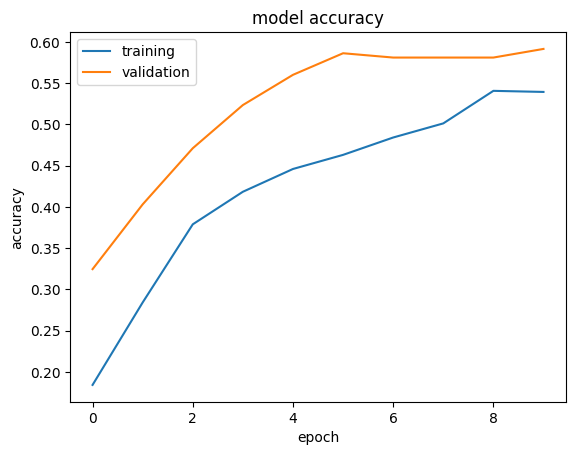

In [75]:
# Creating Accuracy curves for Training and Validation sets for 'model1'

# Training set loss and accuracy

loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)

#Plot for 'Accuracy'

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()


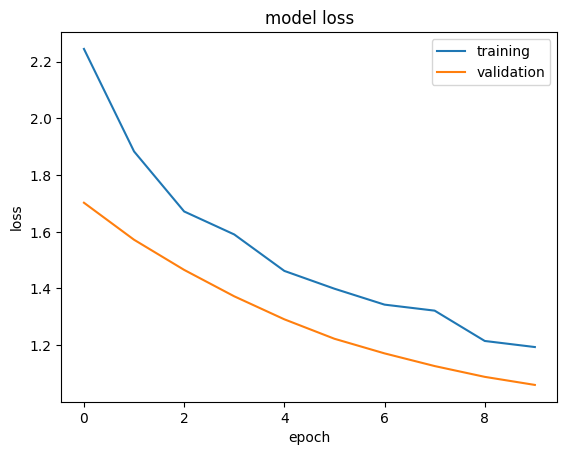

In [76]:
#Plot for 'Loss'

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()


**Observations**
*   Accuracy:
        1. 'Model1' with Dropouts and BatchNormalizations (referred as M1) has no substantial increase in it's Training accuracy while 'Model' (referred as M0) without any dropouts etc. had a better 'Validation' accuray
        2.  M1's accuracy within each epoch is more linear as compared to M0's accuracy graph

*   Loss:

        1. The loss is M0's validation set is lower and hence better than that of M1

* **Conclusion**: Model-M0 is better than M1 due to it's lower Loss and higer accuracy on the Validation Set

# **Part-2: .H5 File**

In [77]:
import h5py

In [86]:
path_h5 = '/content/drive/MyDrive/GL - Neural Networks Project/Autonomous_Vehicles_SVHN_single_grey1.h5'

with h5py.File(path_h5, 'r') as f:
    print(list(f.keys()))

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


In [129]:
with h5py.File(path_h5, 'r') as f:
    hx_train = f['X_train'][:]
    hy_train_og = f['y_train'][:]
    hx_val = f['X_val'][:]
    hy_val_og = f['y_val'][:]
    hx_test = f['X_test'][:]
    hy_test_og = f['y_test'][:]

In [130]:
# Printing the shapes of each of the datasets
print(
      hx_train.shape,
      hy_train_og.shape,
      hx_val.shape,
      hy_val_og.shape,
      hx_test.shape,
      hy_test_og.shape
)


(42000, 32, 32) (42000,) (60000, 32, 32) (60000,) (18000, 32, 32) (18000,)


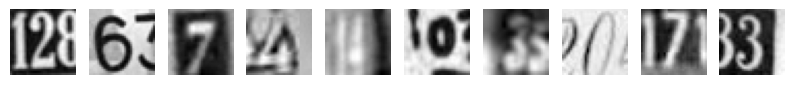

Label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [131]:
# Visualizing the first 10 images in the x_train dataset along with their labels
'''** Code referred from class notes'''

%matplotlib inline

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(hx_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('Label for each of the above image: %s' % (hy_train_og[0:10]))

In [149]:
# Re-shaping all the images
'''
  Note:
    Here, our images are of 32*32 (=1,024) pixels, and there are 42,000 images provided in the x_train.
    We'll now "flatten" these images into a 2-D matrix of shape: (42,000, 1,024) for x_train
    and similarily for x_test, and x_val
'''

reshape_dim = 32*32

hx_train = hx_train.reshape(hx_train.shape[0], reshape_dim)
hx_test = hx_test.reshape(hx_test.shape[0], reshape_dim)
hx_val = hx_val.reshape(hx_val.shape[0], reshape_dim)

In [150]:
# Normailzing the data within each of "x" datasets

'''
  Considering each of the pixle values range from 0 to 255 (256 bits)
'''


hx_train = hx_train / 255.0
hx_test = hx_test / 255.0
hx_val = hx_val / 255.0

In [151]:
# Priting the "new" train, val, and test data shapes

print('Training set', hx_train.shape, hy_train_og.shape)
print('Validation set', hx_val.shape, hy_val_og.shape)
print('Test set', hx_test.shape, hy_test_og.shape)

Training set (42000, 1024) (42000,)
Validation set (60000, 1024) (60000,)
Test set (18000, 1024) (18000,)


In [152]:
# Again, one hot encoding the 'y' labels for training the Neural Network

#Checking for all the unique labels/classes in "y"

np.unique(hy_train_og)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [153]:
#OHE

from tensorflow.keras.utils import to_categorical

hy_train = to_categorical(hy_train_og, 10)
hy_test = to_categorical(hy_test_og, 10)
hy_val = to_categorical(hy_val_og, 10)

In [154]:
hy_train[:5]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [155]:
# Priting the train, val, and test data shapes again

print('Training set', hx_train.shape, hy_train.shape)
print('Validation set', hx_val.shape, hy_val.shape)
print('Test set', hx_test.shape, hy_test.shape)

Training set (42000, 1024) (42000, 10)
Validation set (60000, 1024) (60000, 10)
Test set (18000, 1024) (18000, 10)


## **Neural Network - 2**

In [156]:
from tensorflow.keras import Sequential

model_b = Sequential()

In [157]:
# Adding the required layers to the 'model_b'

model_b.add(Dense(64, input_shape = (1024,), activation = 'relu'))
model_b.add(Dense(256, activation = 'sigmoid'))
model_b.add(Dropout(0.25))
model_b.add(BatchNormalization())
model_b.add(Dense(10, activation = 'softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [158]:
# Assigning the Optimizers and Loss Functions for the 'model_b'

from tensorflow.keras import optimizers, losses

adam_2 = optimizers.Adam(learning_rate=1e-3)
loss = 'categorical_crossentropy'

In [159]:
# Model Compilation

model_b.compile(loss = loss, optimizer =adam_2, metrics = ['accuracy'])

In [160]:
model_b.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                     │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 256)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 85,834 (335.29 KB)

 Trainable params: 85,322 (333.29 KB)

 Non-trainable params: 512 (2.00 KB)

In [161]:
# Creating Callbacks for Model Training


checkpoint = ModelCheckpoint("model_b.weights.h5", monitor='val_accuracy',
                            save_weights_only=True, mode='max',verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.00001,model='auto')

callbacks = [checkpoint,reduce_lr]


In [162]:
history = model_b.fit(hx_train, hy_train, epochs = 15, callbacks = callbacks, validation_data=(hx_test, hy_test))

Epoch 1/15
1300/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1260 - loss: 2.5429
Epoch 1: saving model to model_b.weights.h5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.1266 - loss: 2.5398 - val_accuracy: 0.3843 - val_loss: 1.7082 - learning_rate: 0.0010
Epoch 2/15
1311/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4231 - loss: 1.6373
Epoch 2: saving model to model_b.weights.h5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4232 - loss: 1.6370 - val_accuracy: 0.5768 - val_loss: 1.2825 - learning_rate: 0.0010
Epoch 3/15
1310/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5890 - loss: 1.2748
Epoch 3: saving model to model_b.weights.h5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.5890 - loss: 1.2746 - val_accuracy: 0.6789 - val_loss: 1.0559 - learning_rate: 0.0010
Epoch 4/15
1306/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6467 - loss: 1.1274
Epoch 4: saving model to model_b.weights.h5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/ste

In [163]:
#Predicting hy_test using the model

hy_pred = model_b.predict(hx_test)


563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [164]:
#Checking the probabilities assigned to each of the classes for y_pred[0]
hy_pred[0]

array([0.24882287, 0.02584907, 0.09943929, 0.03200078, 0.02630236,
       0.04456647, 0.10471126, 0.01694541, 0.26016846, 0.14119403],
      dtype=float32)

In [165]:
# Assigning the Class to y_pred basis the max() probability

hy_pred_class=[]

for i in hy_pred:
  hy_pred_class.append((np.argmax(i)))


In [166]:
#Checking the probabilities assigned to each of the classes for y_pred_class[0]
hy_pred_class[0]

8

In [169]:
# Evaluating the model's performance using Classification Report

from sklearn.metrics import classification_report

print(classification_report(hy_test_og, hy_pred_class))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81      1814
           1       0.75      0.84      0.79      1828
           2       0.83      0.81      0.82      1803
           3       0.73      0.75      0.74      1719
           4       0.83      0.83      0.83      1812
           5       0.75      0.76      0.76      1768
           6       0.82      0.76      0.79      1832
           7       0.82      0.82      0.82      1808
           8       0.76      0.73      0.75      1812
           9       0.77      0.74      0.76      1804

    accuracy                           0.79     18000
   macro avg       0.79      0.79      0.79     18000
weighted avg       0.79      0.79      0.79     18000



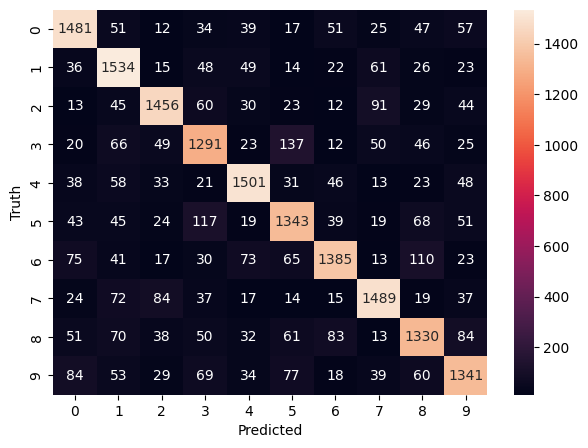

In [171]:
# Creating a heat map of all the TP,FP, TN, and FNs

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(hy_test_og, hy_pred_class)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

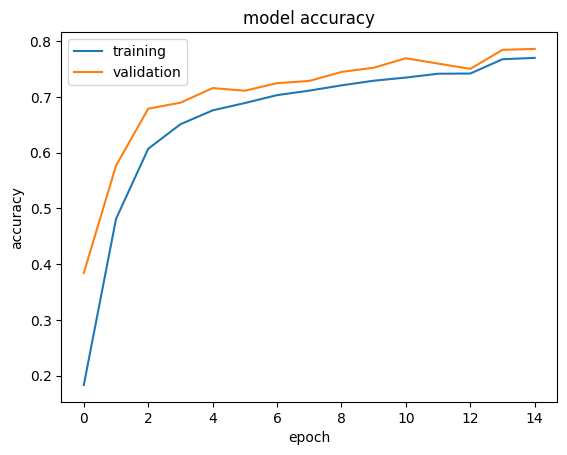

In [172]:
# Creating Accuracy curves for Training and Testing sets

# Training set loss and accuracy

loss, accuracy  = model_b.evaluate(hx_test, hy_test, verbose=False)

#Plot

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()


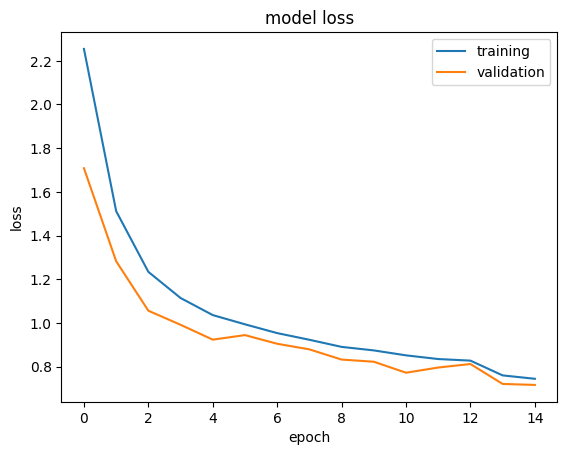

In [173]:
#Plotting for 'Loss'

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()


**Observations:**

*   **Accuracy**:
      1. Though the model's performance was in 90+% accuracy, the model did fine when it comes to balancing the bais and variance as apparant from the accracy scores of Training and Validation sets
      
*   **Loss**:
       1. The model also managed to decrease the loss as observed from the graph which shows a linear decrease in loss and the loss being almost consistent with both Training and Validation sets
      
* **Predictions**:
    1. From the Heat-map, it is evident that the model made the most number of False calls between the classes - ('3' and '5') and ('6' and '8')